### onehot encoder

In [9]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [11]:
y=iris.loc[:,'species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [15]:
import pandas as pd
one_hot_encoded_data=pd.get_dummies(iris,columns=['species'])
print(one_hot_encoded_data)

     sepal_length  sepal_width  petal_length  petal_width  species_setosa  \
0             5.1          3.5           1.4          0.2               1   
1             4.9          3.0           1.4          0.2               1   
2             4.7          3.2           1.3          0.2               1   
3             4.6          3.1           1.5          0.2               1   
4             5.0          3.6           1.4          0.2               1   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3               0   
146           6.3          2.5           5.0          1.9               0   
147           6.5          3.0           5.2          2.0               0   
148           6.2          3.4           5.4          2.3               0   
149           5.9          3.0           5.1          1.8               0   

     species_versicolor  species_virginica  
0                     0       

In [19]:
df=iris
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df=pd.DataFrame(encoder.fit_transform(df[['species']]).toarray())
final_df=df.join(encoder_df)
print(final_df)

     sepal_length  sepal_width  petal_length  petal_width    species    0  \
0             5.1          3.5           1.4          0.2     setosa  1.0   
1             4.9          3.0           1.4          0.2     setosa  1.0   
2             4.7          3.2           1.3          0.2     setosa  1.0   
3             4.6          3.1           1.5          0.2     setosa  1.0   
4             5.0          3.6           1.4          0.2     setosa  1.0   
..            ...          ...           ...          ...        ...  ...   
145           6.7          3.0           5.2          2.3  virginica  0.0   
146           6.3          2.5           5.0          1.9  virginica  0.0   
147           6.5          3.0           5.2          2.0  virginica  0.0   
148           6.2          3.4           5.4          2.3  virginica  0.0   
149           5.9          3.0           5.1          1.8  virginica  0.0   

       1    2  
0    0.0  0.0  
1    0.0  0.0  
2    0.0  0.0  
3    0.0  0

In [ ]:
# X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)
OneHotEncoder(handle_unknown='ignore')
enc.categories_
# [array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
# enc.transform([['Female', 1], ['Male', 4]]).toarray()
# array([[1., 0., 1., 0., 0.],
#        [0., 1., 0., 0., 0.]])

### 处理不平衡数据

#### naive random over-sampling

#### SMOTE

Counter({0: 9900, 1: 100})


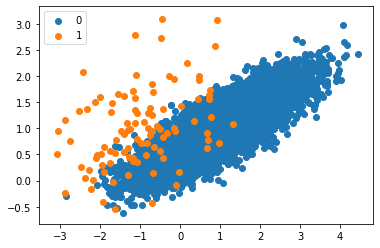

In [4]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 9900, 1: 9900})


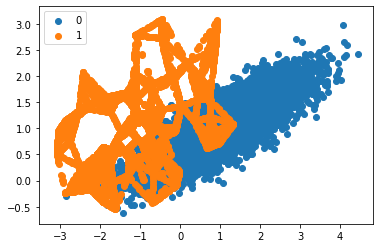

In [6]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()